In [1]:
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.manifold
import sklearn.decomposition
import sklearn.metrics
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("train.csv")
df = data.drop("id", axis=1)
print(df.shape)

(61878, 94)


In [4]:
df['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 94 columns):
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null int64
feat_28    61878 non-null i

In [7]:
mapping = {'Class_2':2, 'Class_6':6, 'Class_8':8, 'Class_3':3, 'Class_9':9, 'Class_7':7, 'Class_4':4, 'Class_5':5, 'Class_1':1}      
#mapping = {'set': 1, 'test': 2}
df_cat = df.replace({'target': mapping})

In [8]:
df_cat.head()



,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [9]:
y = df_cat['target'].values
X = df_cat.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

In [10]:
from sklearn.decomposition import PCA


In [11]:
pca = PCA(n_components=2)
pca.fit(X_train)
model_pca_trans = pca.fit_transform(X_train)

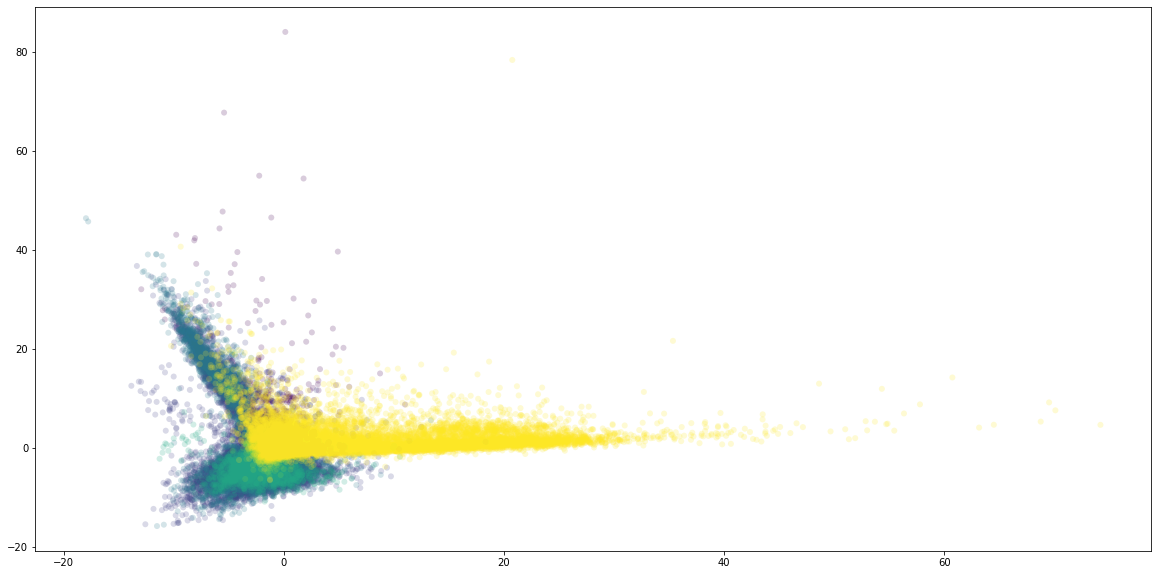

In [12]:
plt.figure(figsize=(20, 10))
label_color_dict = {label:idx for idx, label in enumerate(np.unique(y_train))}
cvec = [label_color_dict[label] for label in y_train]
plt.scatter(model_pca_trans[:, 0], model_pca_trans[:, 1], c=cvec, edgecolor='', alpha=0.2)

In [13]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,  learning_rate=1000, init="random", random_state=1234).fit_transform(X_train)

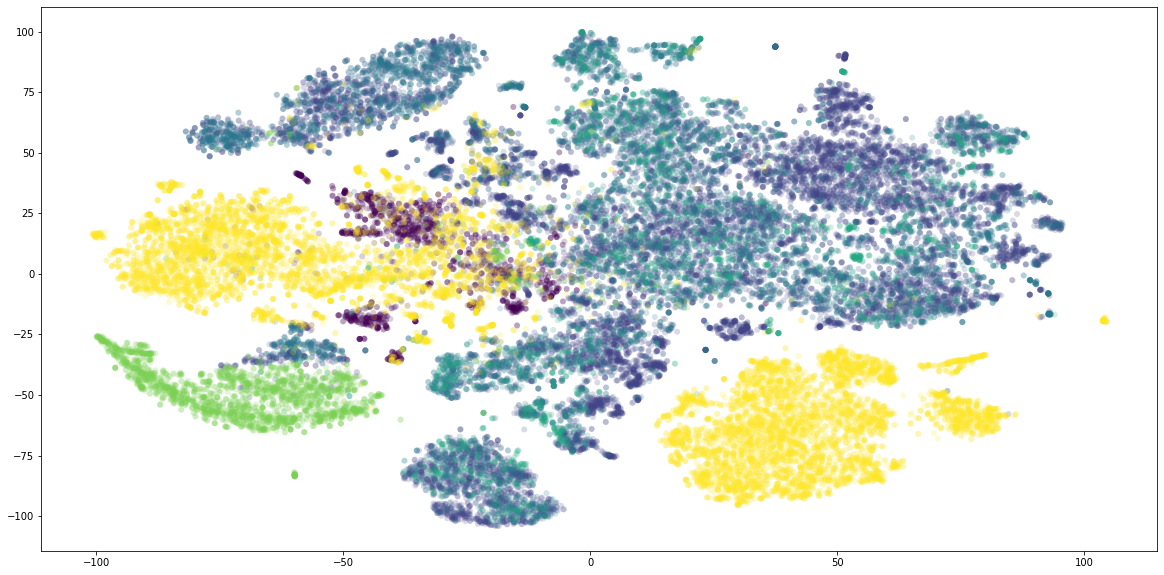

In [14]:
plt.figure(figsize=(20, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cvec, edgecolor='', alpha=0.2)